In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport 
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


#### Read and look at data

In [2]:
train = pd.read_csv('data/train.csv')

test = pd.read_csv('data/test.csv')


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
ProfileReport(train)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [6]:
ProfileReport(test)

Number of variables,11
Number of observations,418
Total Missing (%),9.0%
Total size in memory,36.0 KiB
Average record size in memory,88.2 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),1
Rejected,0


#### Select from all features only data for train and test

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
cols = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

train_df, test_df = train[cols], test[cols]
y_train = train['Survived']


train_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### check for missing values

In [9]:
train_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
test_df.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

#### Look at hist to choose in what strategy fill na(if distribution is nearly normal - fill na by mean, otherwise - fill na by median)

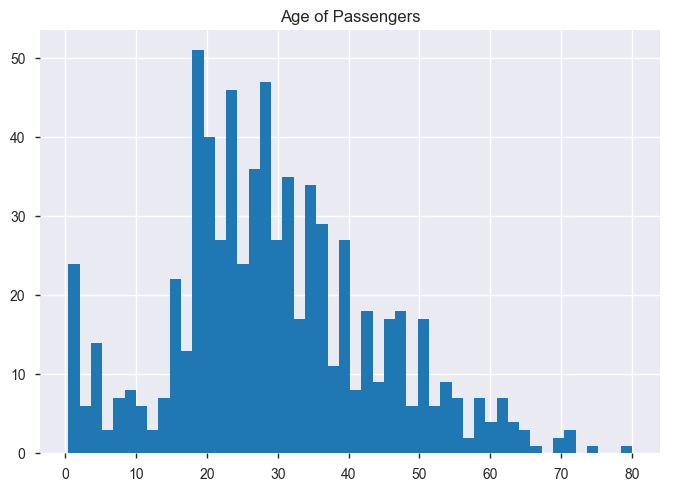

In [11]:
plt.hist(train_df['Age'].dropna(), bins=50)
plt.title('Age of Passengers')
plt.show()

#### So, fill na by median

In [12]:
for dataset in [test_df, train_df]:
    dataset['Age'].fillna(train_df['Age'].median(), inplace=True)
    dataset['Embarked'].fillna('S', inplace=True)
    dataset['Fare'].fillna(train_df['Fare'].median(), inplace=True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


#### Encode Pclass as ordinal feature

In [15]:
for dataset in [train_df, test_df]:
    dataset['Pclass'] = dataset['Pclass'].replace({1: 3, 3: 1})

In [16]:
train_df.Pclass.value_counts()

1    491
3    216
2    184
Name: Pclass, dtype: int64

In [17]:
test_df.Pclass.value_counts()

1    218
3    107
2     93
Name: Pclass, dtype: int64

In [18]:
train_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,1,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [19]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,1,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


### Some plots

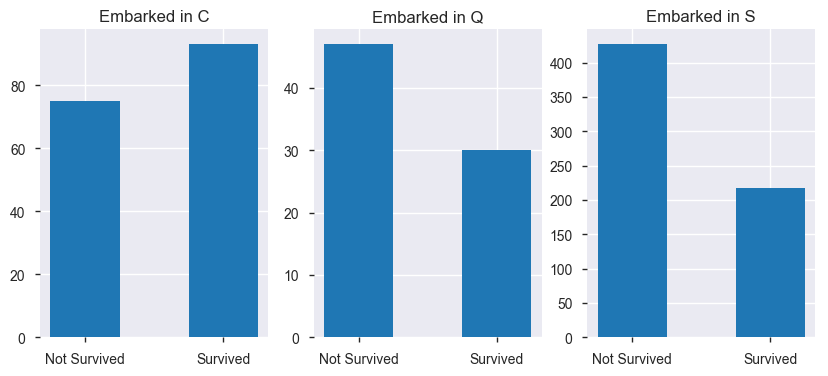

In [20]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(10,4))
plt.setp(ax, xticks=train.loc[train['Embarked'] == 'C', 'Survived'].value_counts().sort_index().index,
         xticklabels=('Not Survived', 'Survived'))

ax[0].title.set_text('Embarked in C')
ax[0].bar(train.loc[train['Embarked'] == 'C', 'Survived'].value_counts().sort_index().index, 
        train.loc[train['Embarked'] == 'C', 'Survived'].value_counts().sort_index().values, width=0.5)

ax[1].title.set_text('Embarked in Q')
ax[1].bar(train.loc[train['Embarked'] == 'Q', 'Survived'].value_counts().sort_index().index, 
        train.loc[train['Embarked'] == 'Q', 'Survived'].value_counts().sort_index().values, width=0.5)

ax[2].title.set_text('Embarked in S')
ax[2].bar(train.loc[train['Embarked'] == 'S', 'Survived'].value_counts().sort_index().index, 
        train.loc[train['Embarked'] == 'S', 'Survived'].value_counts().sort_index().values, width=0.5)


plt.show()

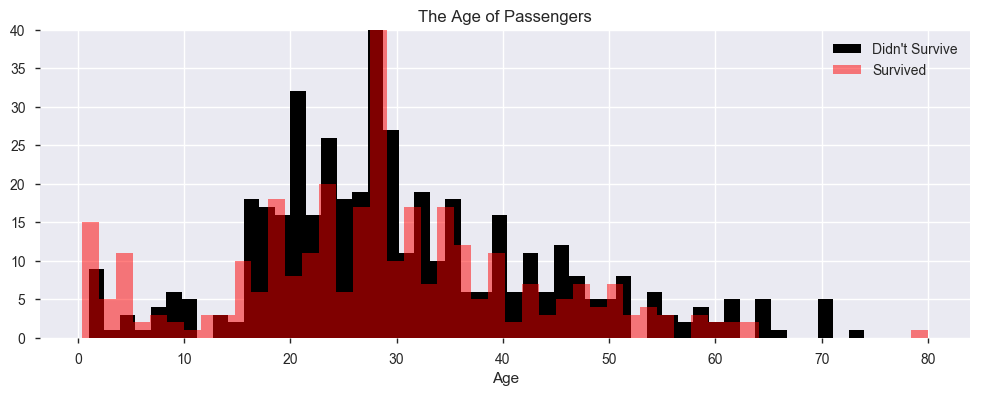

In [21]:
fig = plt.figure(figsize=(12, 4))

plt.title('The Age of Passengers')
plt.xlabel('Age')
plt.ylim((0,40))
plt.hist(train_df.loc[train['Survived'] == 0, 'Age'], bins=50, color='black', label="Didn't Survive")
plt.hist(train_df.loc[train['Survived'] == 1, 'Age'], bins=50, alpha=0.5, color='red', label='Survived')
plt.legend()
plt.show()

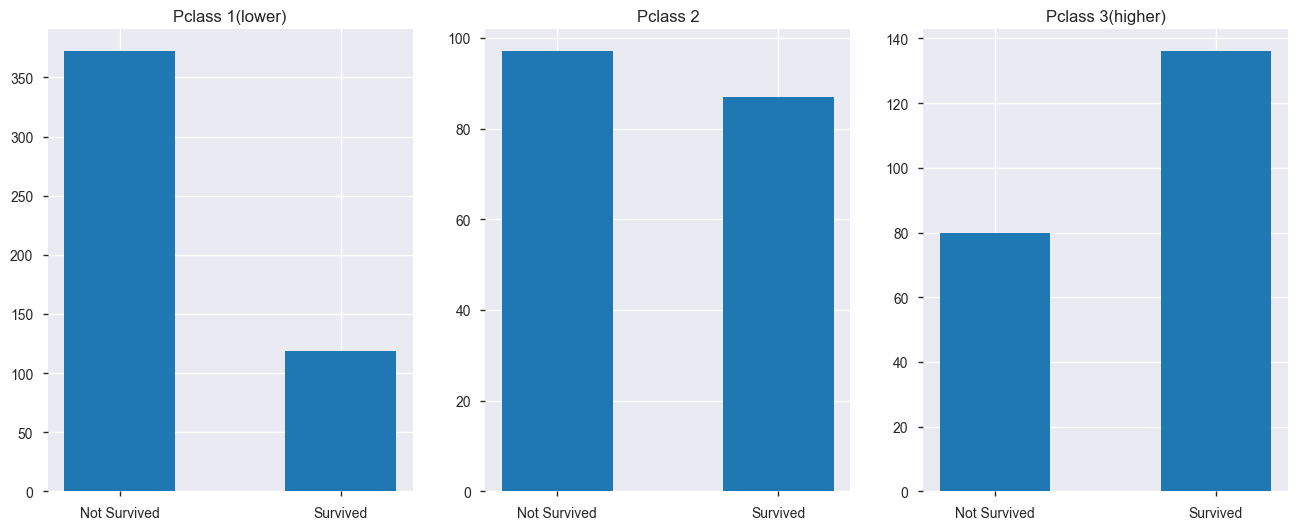

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(16,6))

plt.setp(ax, xticks=train.loc[train['Pclass'] == 1, 'Survived'].value_counts().sort_index().index,
         xticklabels=('Not Survived', 'Survived'))

ax[0].title.set_text('Pclass 1(lower)')
ax[0].bar(train.loc[train['Pclass'] == 3, 'Survived'].value_counts().sort_index().index, 
        train.loc[train['Pclass'] == 3, 'Survived'].value_counts().sort_index().values, width=0.5)

ax[1].title.set_text('Pclass 2')
ax[1].bar(train.loc[train['Pclass'] == 2, 'Survived'].value_counts().sort_index().index, 
        train.loc[train['Pclass'] == 2, 'Survived'].value_counts().sort_index().values, width=0.5)

ax[2].title.set_text('Pclass 3(higher)')
ax[2].bar(train.loc[train['Pclass'] == 1, 'Survived'].value_counts().sort_index().index, 
        train.loc[train['Pclass'] == 1, 'Survived'].value_counts().sort_index().values, width=0.5)


plt.show()

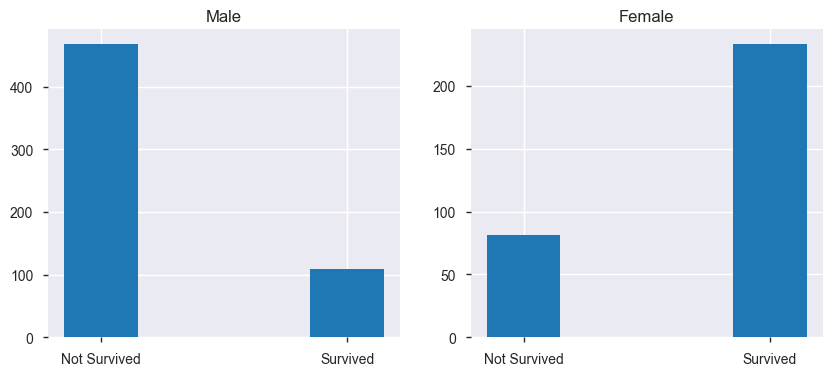

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

plt.setp(ax, xticks=[0, 1], xticklabels=['Not Survived', 'Survived'])

ax[0].title.set_text('Male')
ax[0].bar(train.loc[train['Sex'] == 'male', 'Survived'].value_counts().sort_index().index, 
          train.loc[train['Sex'] == 'male', 'Survived'].value_counts().sort_index().values, width=0.3)

ax[1].title.set_text('Female')
ax[1].bar(train.loc[train['Sex'] == 'female', 'Survived'].value_counts().sort_index().index, 
          train.loc[train['Sex'] == 'female', 'Survived'].value_counts().sort_index().values, width=0.3)

plt.show()

#### Encode Sex and Embarked Features using One-Hot

In [24]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

train_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,1,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


In [25]:
test_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,"Kelly, Mr. James",34.5,0,0,7.8292,0,1,0,1,0
1,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,1,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,0,1,0,1,0
3,1,"Wirz, Mr. Albert",27.0,0,0,8.6625,0,1,0,0,1
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,1,0,0,0,1


#### Perform Scaling of Age and Fare features

In [26]:
min_max_scaler = MinMaxScaler()

train_df[['Age', 'Fare']] = min_max_scaler.fit_transform(train_df[['Age', 'Fare']])

test_df[['Age', 'Fare']] = min_max_scaler.transform(test_df[['Age', 'Fare']])

In [27]:
train_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,"Braund, Mr. Owen Harris",0.271174,1,0,0.014151,0,1,0,0,1
1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,0.139136,1,0,1,0,0
2,1,"Heikkinen, Miss. Laina",0.321438,0,0,0.015469,1,0,0,0,1
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,0.103644,1,0,0,0,1
4,1,"Allen, Mr. William Henry",0.434531,0,0,0.015713,0,1,0,0,1


In [28]:
test_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,"Kelly, Mr. James",0.428248,0,0,0.015282,0,1,0,1,0
1,1,"Wilkes, Mrs. James (Ellen Needs)",0.585323,1,0,0.013663,1,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",0.773813,0,0,0.018909,0,1,0,1,0
3,1,"Wirz, Mr. Albert",0.334004,0,0,0.016908,0,1,0,0,1
4,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.271174,1,1,0.023984,1,0,0,0,1


### Create Feature - 'Title'

In [29]:
for dataset in [train_df, test_df]:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [30]:
train_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,"Braund, Mr. Owen Harris",0.271174,1,0,0.014151,0,1,0,0,1,Mr
1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,0.139136,1,0,1,0,0,Mrs
2,1,"Heikkinen, Miss. Laina",0.321438,0,0,0.015469,1,0,0,0,1,Miss
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,0.103644,1,0,0,0,1,Mrs
4,1,"Allen, Mr. William Henry",0.434531,0,0,0.015713,0,1,0,0,1,Mr


In [31]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Don           1
Ms            1
Sir           1
Mme           1
Capt          1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [32]:
train_df['Title'].replace(['Ms', 'Mme'], 'Mrs', inplace=True)
test_df['Title'].replace(['Ms', 'Mme'], 'Mrs', inplace=True)

train_df.Title.replace(train_df.Title.value_counts().index[4:], 'Other', inplace=True)
test_df.Title.replace(test_df.Title.value_counts().index[4:], 'Other', inplace=True)

In [33]:
train_df.Title.value_counts()

Mr        517
Miss      182
Mrs       127
Master     40
Other      25
Name: Title, dtype: int64

In [34]:
test_df.Title.value_counts()

Mr        240
Miss       78
Mrs        73
Master     21
Other       6
Name: Title, dtype: int64

In [35]:
train_df.drop(['Name'], axis=1, inplace=True)

test_df.drop(['Name'], axis=1, inplace=True)

In [36]:
train_df.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
122,2,0.403116,1,0,0.058694,0,1,1,0,0,Mr
415,1,0.346569,0,0,0.015713,1,0,0,0,1,Mrs
478,1,0.271174,0,0,0.014680,0,1,0,0,1,Mr
226,2,0.233476,0,0,0.020495,0,1,0,0,1,Mr
777,1,0.057552,0,0,0.024350,1,0,0,0,1,Miss


In [37]:
test_df.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title
297,1,0.346569,2,0,0.042315,0,1,1,0,0,Mr
203,2,0.095250,1,1,0.050749,1,0,0,0,1,Miss
335,3,0.371701,0,0,0.050749,0,1,0,0,1,Mr
146,3,0.346569,0,0,0.101229,0,1,0,0,1,Mr
265,1,0.346569,0,0,0.015412,0,1,0,0,1,Mr


#### Encode Title

In [38]:
train_df = pd.get_dummies(train_df, columns=['Title'])
test_df = pd.get_dummies(test_df, columns=['Title'])

In [39]:
train_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0.271174,1,0,0.014151,0,1,0,0,1,0,0,1,0,0
1,3,0.472229,1,0,0.139136,1,0,1,0,0,0,0,0,1,0
2,1,0.321438,0,0,0.015469,1,0,0,0,1,0,1,0,0,0
3,3,0.434531,1,0,0.103644,1,0,0,0,1,0,0,0,1,0
4,1,0.434531,0,0,0.015713,0,1,0,0,1,0,0,1,0,0


In [40]:
test_df.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
47,1,0.346569,0,0,0.015127,0,1,0,1,0,0,0,1,0,0
160,1,0.346569,0,0,0.015094,1,0,0,1,0,0,1,0,0,0
107,1,0.346569,0,0,0.015127,0,1,0,1,0,0,0,1,0,0
92,3,0.334004,1,2,0.101497,1,0,0,0,1,0,0,0,1,0
353,2,0.610455,1,2,0.126872,0,1,0,0,1,0,0,1,0,0


### Create feature - 'is_alone'

In [41]:
for dataset in [train_df, test_df]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
for dataset in [train_df, test_df]:
    dataset['is_alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'is_alone'] = 1
    
train_df.drop(['Parch','SibSp','FamilySize'], axis=1, inplace=True)
test_df.drop(['Parch','SibSp','FamilySize'], axis=1, inplace=True)

In [42]:
train_df.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,is_alone
0,1,0.271174,0.014151,0,1,0,0,1,0,0,1,0,0,0
1,3,0.472229,0.139136,1,0,1,0,0,0,0,0,1,0,0
2,1,0.321438,0.015469,1,0,0,0,1,0,1,0,0,0,1
3,3,0.434531,0.103644,1,0,0,0,1,0,0,0,1,0,0
4,1,0.434531,0.015713,0,1,0,0,1,0,0,1,0,0,1


In [43]:
test_df.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,is_alone
0,1,0.428248,0.015282,0,1,0,1,0,0,0,1,0,0,1
1,1,0.585323,0.013663,1,0,0,0,1,0,0,0,1,0,0
2,2,0.773813,0.018909,0,1,0,1,0,0,0,1,0,0,1
3,1,0.334004,0.016908,0,1,0,0,1,0,0,1,0,0,1
4,1,0.271174,0.023984,1,0,0,0,1,0,0,0,1,0,0


In [44]:
train_df['Survived'] = y_train

train_df.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,is_alone,Survived
0,1,0.271174,0.014151,0,1,0,0,1,0,0,1,0,0,0,0
1,3,0.472229,0.139136,1,0,1,0,0,0,0,0,1,0,0,1
2,1,0.321438,0.015469,1,0,0,0,1,0,1,0,0,0,1,1
3,3,0.434531,0.103644,1,0,0,0,1,0,0,0,1,0,0,1
4,1,0.434531,0.015713,0,1,0,0,1,0,0,1,0,0,1,0


In [45]:
train_df.to_csv('data/preprocessed_train.csv', index=False)
test_df.to_csv('data/preprocessed_test.csv', index=False)